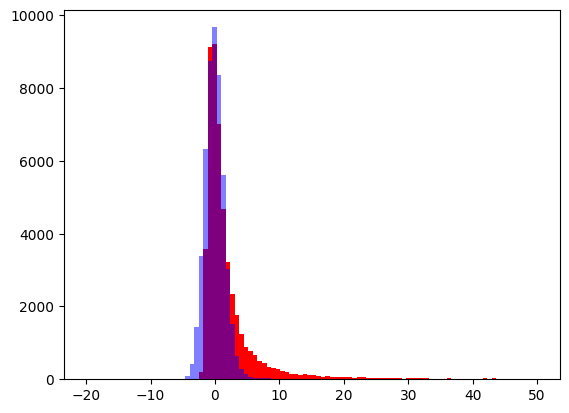

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable

generator = np.random.Generator(np.random.PCG64(seed=123))
a = levy_stable(alpha=1, beta=1.0, loc=0.0, scale=1.0).rvs(size=50000, random_state=generator)
b = levy_stable(alpha=1.9, beta=1.0, loc=0.0, scale=1.0).rvs(size=50000, random_state=generator)
fig, axs = plt.subplots(1)
axs.hist(a, bins = 100, color = 'r', range=(-20,50))
axs.hist(b, bins = 100, color = 'b', alpha = 0.5, range=(-20,50))
# fig.savefig('histogram.png')
plt.show()

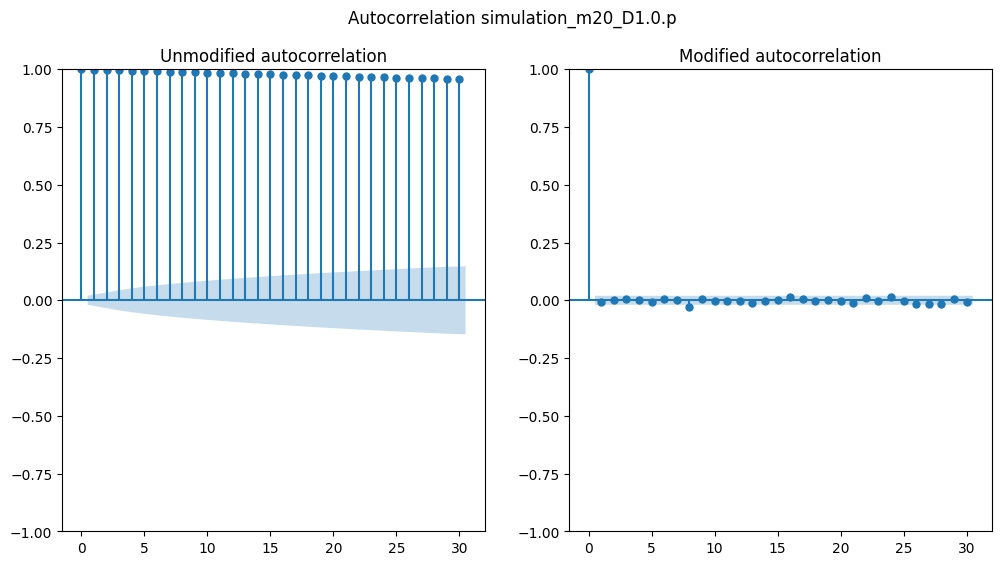

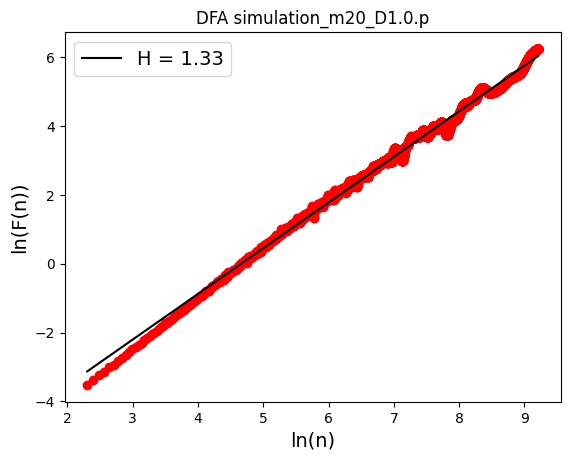

In [1]:
import pickle
import numpy as np
from monostable_model import calculate_autocorrelation_acf, calculate_autocorrelation_dfa
import matplotlib.pyplot as plt
file_path = 'data/'
file_name = 'simulation_m20_D1.0.p'
current = pickle.load(open(file_path+file_name, 'rb'))['x'][:10000]
calculate_autocorrelation_acf(current, title=file_name)
# fig.savefig('outputs/autocorrelation_acf_simulation_m20_D1.0.png')
calculate_autocorrelation_dfa(current, title=file_name)

178
179
True
0.044901089957896545


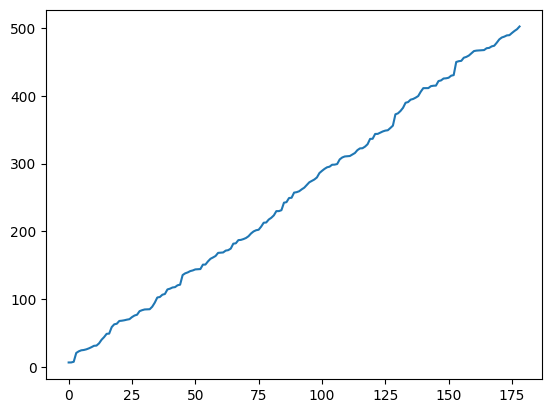

In [2]:
# plt.plot(current['x'][:50000])
plt.plot(current['dwell times'])
print(len(np.diff(current['dwell times'])))
print(len(current['dwell times']))
print(current['dwell times'][2] - current['dwell times'][1] == np.diff(current['dwell times'])[1])
print(current['dwell times'][1] - current['dwell times'][0])
plt.show()

NameError: name 'current' is not defined

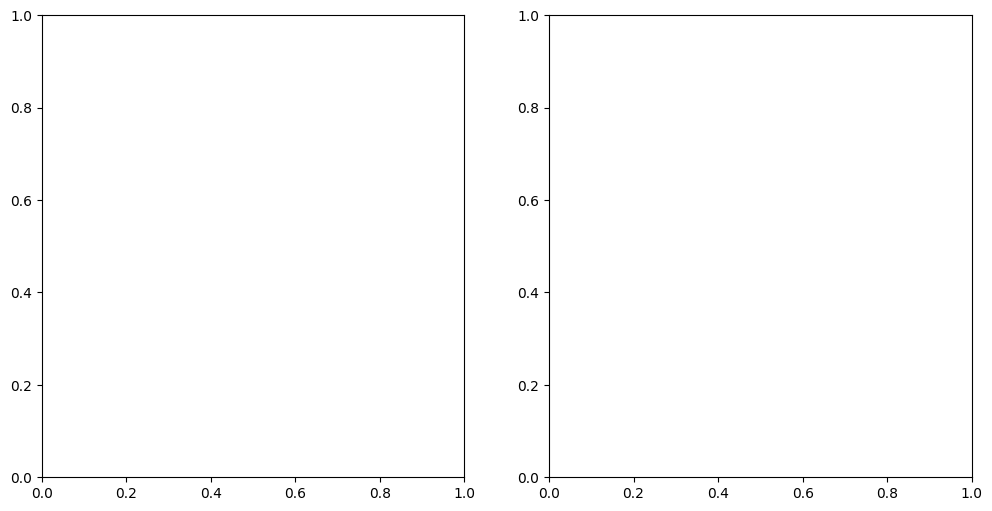

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from monostable_model import calculate_autocorrelation_acf, calculate_autocorrelation_dfa
data = np.random.normal(0, 1, 100000)
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
calculate_autocorrelation_acf(current['x'], fig, axs, title='Random noise')
calculate_autocorrelation_dfa(data, title='Random noise')

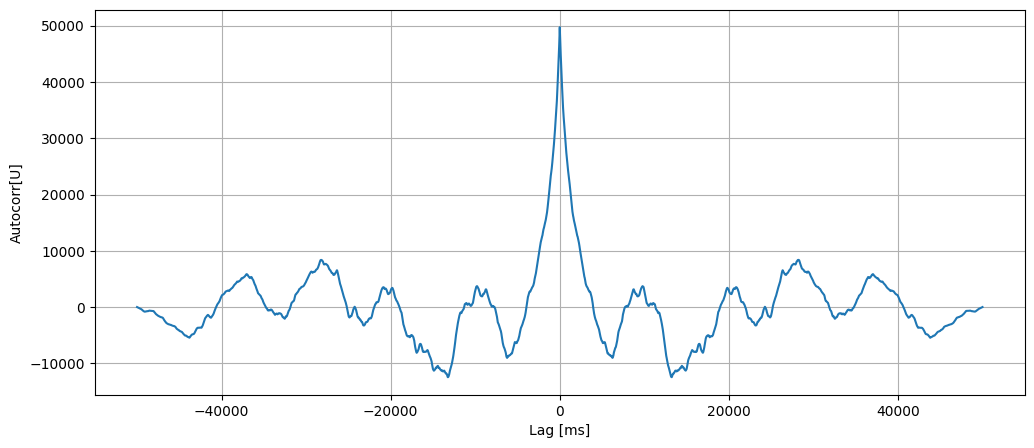

In [3]:
import pickle
import numpy as np
from monostable_model import calculate_autocorelation_acf, calculate_autocorelation_dfa
import matplotlib.pyplot as plt

def autocorr(x):
    return np.correlate(x, x, mode='full')

file_path = 'data/'
file_name = 'simulation_m20_D1.0.p'
current = pickle.load(open(file_path+file_name, 'rb'))

fig, ax = plt.subplots(figsize=(12., 5.))
U_autocorr = autocorr(current['x'][:50000])
lags = np.arange(len(U_autocorr)) - len(U_autocorr) / 2
ax.plot(lags, U_autocorr)
ax.set_xlabel("Lag [ms]")
ax.set_ylabel("Autocorr[U]")
ax.grid()

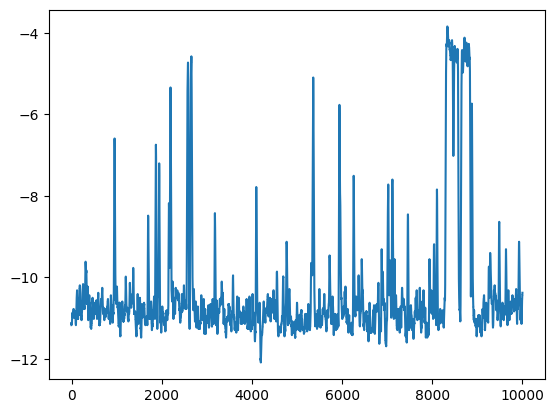

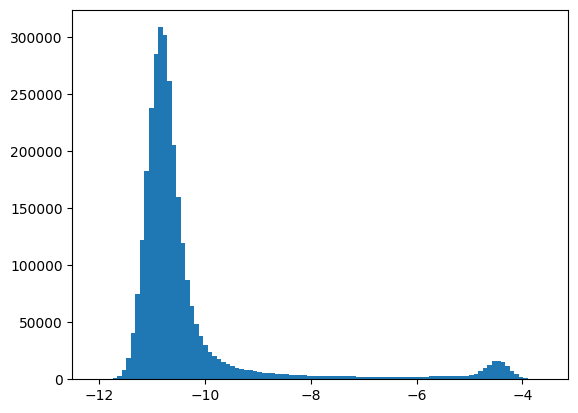

In [12]:
import matplotlib.pyplot as plt
cnt = 0
sum = 0
file_data = []
batch_size = 1
file_path = "data/hip16.txt"
with open(file_path) as data_file:
    for record in data_file:
        if cnt < batch_size:
            record = record.strip()
            sum += float(record)
            cnt += 1
        else:
            cnt = 0
            file_data.append(sum / batch_size)
            sum = 0
start = 10000
end = 20000
plt.plot(file_data[start:end])
plt.show()
plt.hist(file_data, bins=100)
plt.show()

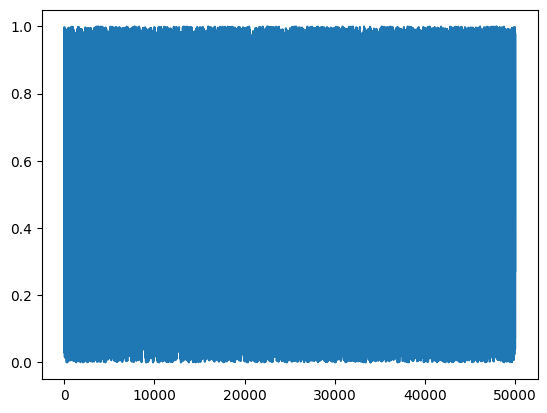

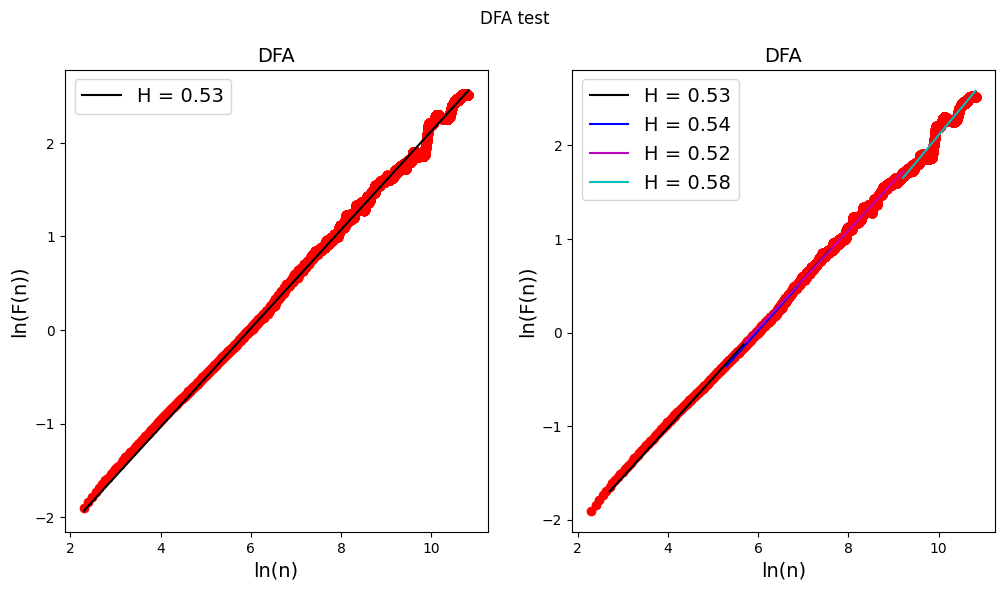

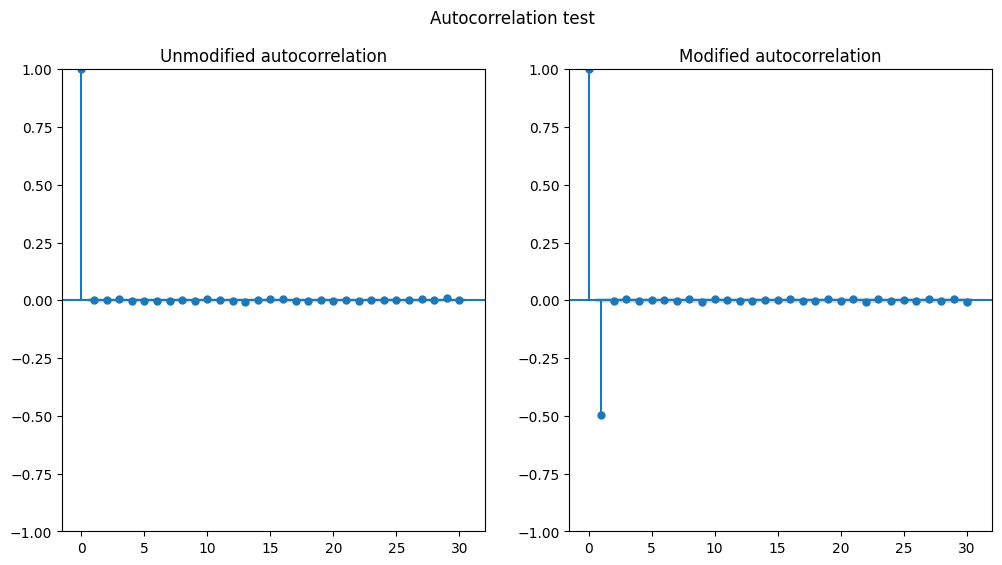

In [2]:
import hurst
import numpy as np
from monostable_model import calculate_autocorrelation_acf, calculate_autocorrelation_dfa
import matplotlib.pyplot as plt
a = np.random.random(50000)
plt.plot(a)
calculate_autocorrelation_dfa(a)
calculate_autocorrelation_acf(a)

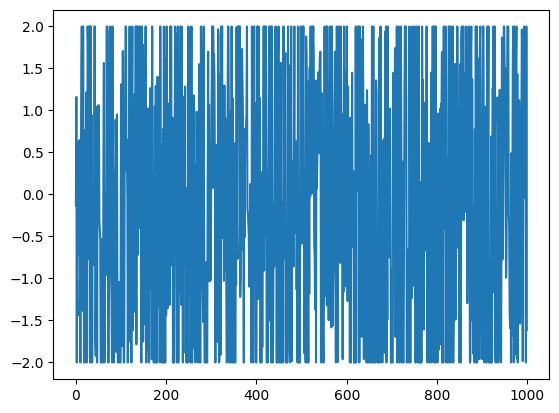

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
data = np.random.randn(1000) * 2  # Some generated data

# Define limits
lower_limit = -2
upper_limit = 2

# Clip values
clipped_data = np.clip(data, lower_limit, upper_limit)
plt.plot(clipped_data)

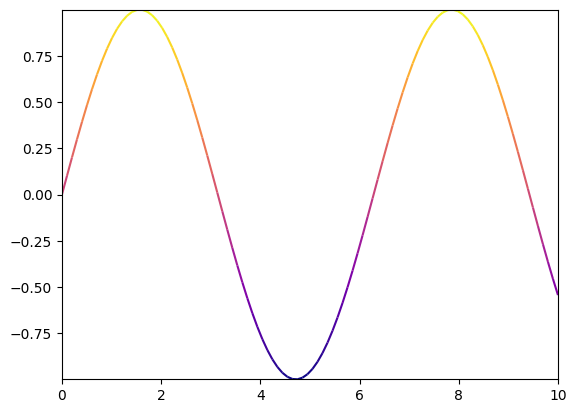

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)
colors = y  # Color by y-values

# Create segments
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create LineCollection
lc = LineCollection(segments, cmap='plasma', norm=plt.Normalize(colors.min(), colors.max()))
lc.set_array(colors)

# Plot
fig, ax = plt.subplots()
ax.add_collection(lc)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

# Add colorbar

# plt.colorbar(lc, ax=ax, label="Value")

plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt

class TestFunctions:

    def __init__(self, a, L, k, opened_larger, opened_state):
        self.__a = a
        self.__k = k
        self.__L = L
        self.__opened_larger = opened_larger
        self.__opened_state = opened_state

    def model_force_square(self, x, b):
        """Function calculates force value using square function.

        Parameters
        ---------
        x : float 
            Position value.
        b : float 
            Coefficient.

        Returns
        -------
        float: 
            Force value at x.
        """
        return -self.__a*(x - b)
    
    def __u(self, x, b):
        return (x - b) / self.__L
    
    def model_force_asymetrical(self, x, b):

        if self.__opened_larger:
            k = -self.__k if self.__opened_state else self.__k
        else:
            k = self.__k if self.__opened_state else -self.__k
        u_x = self.__u(x, b)
        return -(self.__a*self.__L) * (u_x + k * (u_x) ** 2 + (k ** 2 * (u_x) ** 3) / 2 - (k * u_x **4) / 3)

    def model_force_e(self, x, b):
        if self.__opened_larger:
            k = -self.__k if self.__opened_state else self.__k
        else:
            k = self.__k if self.__opened_state else -self.__k
        return self.model_force_square(x, b) * np.e ** (k * np.tanh((x - b) / self.__L))
    
    def model_force_a(self, x, b):
        if self.__opened_larger:
            k = -self.__k if self.__opened_state else self.__k
        else:
            k = self.__k if self.__opened_state else -self.__k
        return self.model_force_square(x, b) * np.e**(k*(x-b))
        

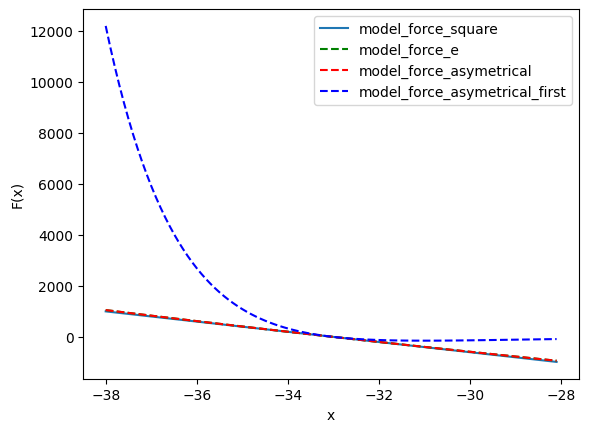

In [10]:
tf = TestFunctions(200, 50, 0.5, opened_larger=True, opened_state=True)
b = -33
X = np.arange(-5 + b, 5 + b, step = 0.1, dtype=np.float32)
mfs = np.array( [ tf.model_force_square(x, b) for x in X])
mfe = np.array( [ tf.model_force_e(x, b) for x in X])
mfa = np.array( [ tf.model_force_asymetrical(x, b) for x in X])
mfas = np.array( [ tf.model_force_a(x, b) for x in X])
plt.plot(X, mfs, label="model_force_square")
plt.plot(X, mfe, 'g--', label="model_force_e")
plt.plot(X, mfa, 'r--', label="model_force_asymetrical")
plt.plot(X, mfas, 'b--', label="model_force_asymetrical_first")

plt.legend()
plt.xlabel("x")
plt.ylabel("F(x)")
plt.savefig("forces.png", bbox_inches="tight")
plt.show()